### Usando o Pacote Caret Para Criar Modelos de Machine Learning em R

In [1]:
library(caret)
library(randomForest)
library(datasets)

Warning message:
"package 'caret' was built under R version 4.2.3"
Carregando pacotes exigidos: ggplot2

Warning message:
"package 'ggplot2' was built under R version 4.2.3"
Carregando pacotes exigidos: lattice

Warning message:
"package 'lattice' was built under R version 4.2.3"
Warning message:
"package 'randomForest' was built under R version 4.2.3"
randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: 'randomForest'


The following object is masked from 'package:ggplot2':

    margin




In [2]:
#Usando o dataset mtcars
head(mtcars,10)
dim(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2


[1] 32 11

In [3]:
set.seed(50)  # para reprodutibilidade
#Usando o pacote Caret para dividir os dados, 70% dos dados para treino
split <- createDataPartition(y= mtcars$mpg, p =0.7, list=FALSE)

In [4]:
dados_treino <- mtcars[split,]
head(dados_treino)
dim(dados_treino)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2


[1] 24 11

In [5]:
dados_teste <- mtcars[-split,]
head(dados_teste)
dim(dados_teste)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
Merc 450SE,16.4,8,275.8,180,3.07,4.070,17.40,0,0,3,3
Merc 450SL,17.3,8,275.8,180,3.07,3.730,17.60,0,0,3,3
Honda Civic,30.4,4,75.7,52,4.93,1.615,18.52,1,1,4,2
AMC Javelin,15.2,8,304.0,150,3.15,3.435,17.30,0,0,3,2


[1]  8 11

In [6]:
library(corrplot)

Warning message:
"package 'corrplot' was built under R version 4.2.3"
corrplot 0.92 loaded



In [7]:
matriz_cor <- cor(dados_treino)

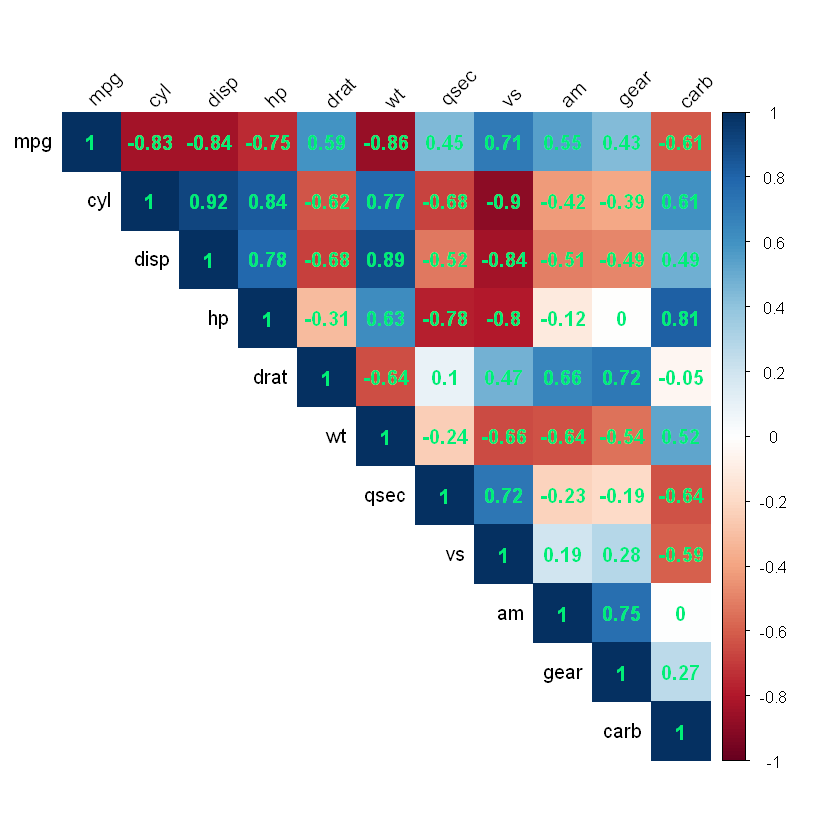

In [8]:
corrplot(matriz_cor, 
         method = 'color', #método de representação gráfica da matriz de correlação. 
         type = 'upper', # plotar apenas a metade superior da matriz de correlação.
         addCoef.col = 'springgreen2', #define a cor dos coeficientes de correlação
         tl.col = "black", #define a cor do texto dos rótulos 
         tl.srt = 45) #define a inclinação (ângulo) dos rótulos

In [9]:
# Utilzando a função varImp para mostrar a importância das variáveis para a criação do modelo
modelo_1 <- train(mpg ~ ., data = dados_treino, method = 'lm')
varImp(modelo_1)

lm variable importance

     Overall
wt   100.000
hp    75.101
disp  63.875
qsec  56.165
am    52.945
carb  28.011
drat  24.354
cyl   17.846
vs     6.286
gear   0.000

In [10]:
#Agora vamos criar um modelo apenas com as variáveis mais relevantes:
# wt: Peso do carro e qsec: Tempo que leva para o carro percorrer o quarto de milha a partir de uma parada.
#Variaveis relevantes que não apresentam colinearidade perfeita
modelo_2 <- train(mpg ~ wt + qsec, data=dados_teste, method = 'lm')

In [11]:
summary(modelo_2)


Call:
lm(formula = .outcome ~ ., data = dat)

Residuals:
    Mazda.RX4    Duster.360    Merc.450SE    Merc.450SL   Honda.Civic 
      -0.5354       -0.7277        1.9302        0.5344       -0.1542 
  AMC.Javelin Porsche.914.2  Ferrari.Dino 
      -2.8378        1.2879        0.5026 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  11.8641    11.9080   0.996 0.364843    
wt           -5.8582     0.7768  -7.541 0.000649 ***
qsec          1.5200     0.6673   2.278 0.071716 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.721 on 5 degrees of freedom
Multiple R-squared:  0.933,	Adjusted R-squared:  0.9062 
F-statistic:  34.8 on 2 and 5 DF,  p-value: 0.001163


In [12]:
#Usando Random forest
modelo_3 <- train(mpg ~ wt + qsec, data=dados_teste, method = 'rf')
summary(modelo_3)

note: only 1 unique complexity parameters in default grid. Truncating the grid to 1 .



Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(

                Length Class      Mode     
call              4    -none-     call     
type              1    -none-     character
predicted         8    -none-     numeric  
mse             500    -none-     numeric  
rsq             500    -none-     numeric  
oob.times         8    -none-     numeric  
importance        2    -none-     numeric  
importanceSD      0    -none-     NULL     
localImportance   0    -none-     NULL     
proximity         0    -none-     NULL     
ntree             1    -none-     numeric  
mtry              1    -none-     numeric  
forest           11    -none-     list     
coefs             0    -none-     NULL     
y                 8    -none-     numeric  
test              0    -none-     NULL     
inbag             0    -none-     NULL     
xNames            2    -none-     character
problemType       1    -none-     character
tuneValue         1    data.frame list     
obsLevels         1    -none-     logical  
param             0    -none-   

In [13]:
# Ajustando o modelo
controle1 <- trainControl(method = "cv", number = 10)

**trainControl:** Essa função do pacote caret é usada para configurar os parâmetros de controle durante o treinamento do modelo.    
**method = "cv":** Define o método de validação cruzada. Neste caso, "cv" refere-se à validação cruzada. A validação cruzada é uma técnica comum para avaliar o desempenho do modelo, onde o conjunto de dados é dividido em várias partes (chamadas de folds), e o modelo é treinado e testado repetidamente em diferentes combinações de folds.  
**number = 10:** Especifica o número de folds na validação cruzada. Neste exemplo, o modelo será treinado e testado 10 vezes, usando 10 folds. Isso é conhecido como 10-fold cross-validation. **Cada fold é usado uma vez como um conjunto de teste**, enquanto os outros folds são usados como conjunto de treinamento. Isso ajuda a estimar o desempenho médio do modelo em diferentes conjuntos de dados.    
Isso significa que, em cada iteração da validação cruzada, 9 partes do seu conjunto de dados são usadas para treinar o modelo, e 1 parte é usada para testar o modelo. Esse processo é repetido 10 vezes, de modo que cada parte é usada exatamente uma vez como conjunto de teste.    
- A validação cruzada é uma técnica importante para avaliar a capacidade de generalização do modelo e reduzir o impacto da aleatoriedade na divisão do conjunto de dados em treinamento e teste.

In [14]:
modelo_4 <- train(mpg ~ wt + qsec, 
                    data = dados_treino, 
                    method = 'lm', 
                    trControl = controle1, 
                    metric = 'Rsquared')
summary(modelo_4)


Call:
lm(formula = .outcome ~ ., data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.2488 -2.0770 -0.2441  1.3620  5.8060 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  20.8767     6.6627   3.133  0.00502 ** 
wt           -4.9211     0.6003  -8.198 5.55e-08 ***
qsec          0.8497     0.3238   2.625  0.01584 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.861 on 21 degrees of freedom
Multiple R-squared:  0.8101,	Adjusted R-squared:  0.792 
F-statistic:  44.8 on 2 and 21 DF,  p-value: 2.655e-08


In [16]:
# Coletando os residuos
residuals <- resid(modelo_1)
data.frame(residuals)

,residuals
,<dbl>
Mazda.RX4.Wag,-2.1787736
Datsun.710,-2.9487153
Hornet.4.Drive,-0.1653321
Hornet.Sportabout,0.4254127
Valiant,-1.3719402
Merc.240D,1.6621591
Merc.230,-1.4048157
Merc.280,0.6598078
Merc.280C,-1.3013091


,predictedValues
,<dbl>
Mazda RX4,24.14935
Duster 360,14.89800
Merc 450SE,12.21052
Merc 450SL,14.38994
Honda Civic,32.43517
AMC Javelin,17.56549
Porsche 914-2,26.58428
Ferrari Dino,20.19487


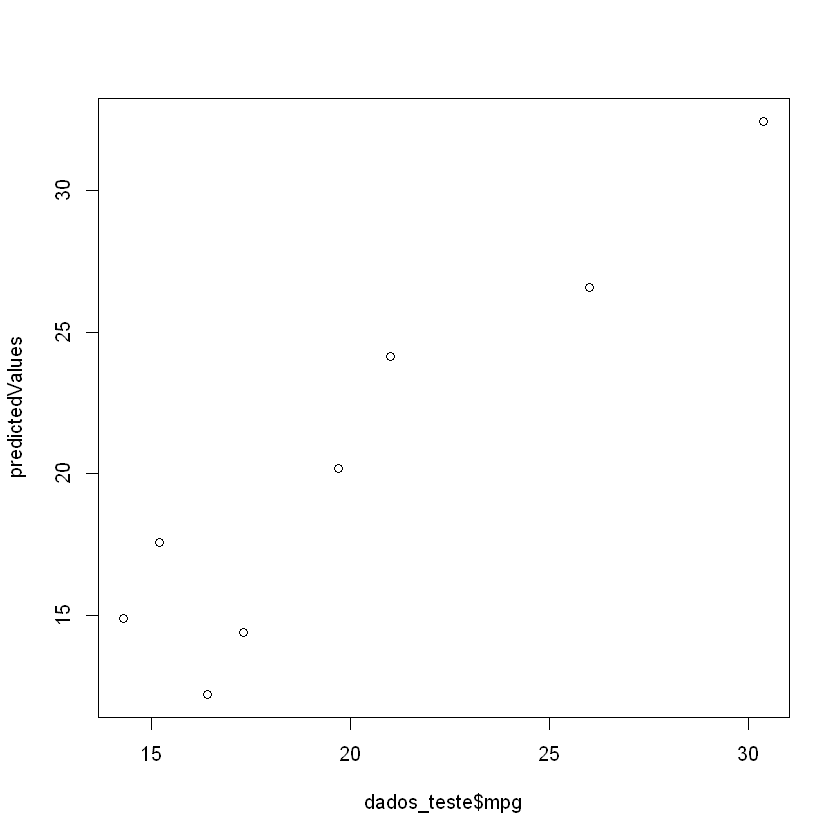

In [18]:
# Previsoes
predictedValues <- predict(modelo_1, dados_teste)
data.frame(predictedValues)
plot(dados_teste$mpg, predictedValues)

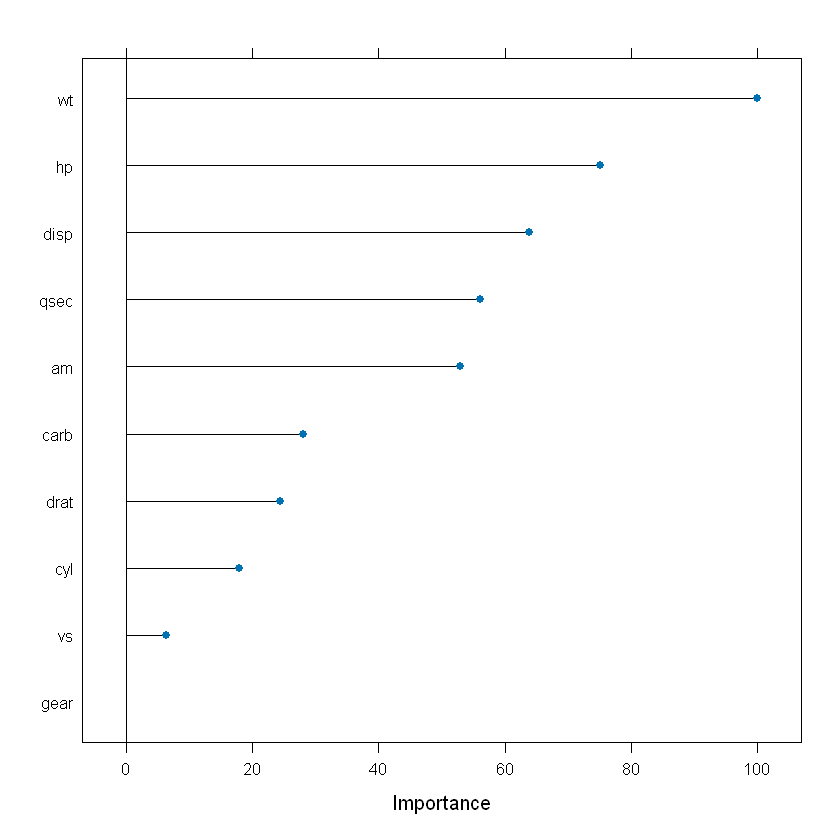

In [19]:
# Plot das variáveis mais relevantes no modelo
plot(varImp(modelo_1))